# CFG Python Project: Data Analysis


In [5]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
def read_sales():
    data = []
    with open('sales.csv', 'r') as sales_csv:
        spreadsheet = csv.DictReader(sales_csv)
        for row in spreadsheet:
            data.append(row)
    return data

In [7]:
def write_sales():
    data = read_sales()
    sales = []
    for row in data:
        sale = int(row['sales'])
        sales.append(sale)
    return sales

In [8]:
def write_expenditures():
    data = read_sales()
    expenditure = []
    for row in data:
        expenditures = int(row['expenditure'])
        expenditure.append(expenditures)
    return expenditure


List of total sales each month: £[6226, 1521, 1842, 2051, 1728, 2138, 7479, 4434, 3615, 5472, 7224, 1812]

List of total expenditures each month: £[3808, 3373, 3965, 1098, 3046, 2258, 2084, 2799, 1649, 1116, 1431, 3532]

List of total monthly profits: £[2418, -1852, -2123, 953, -1318, -120, 5395, 1635, 1966, 4356, 5793, -1720]

List of monthly sales changes as a percentage: [0, -75.6, 21.1, 11.3, -15.7, 23.7, 249.8, -40.7, -18.5, 51.4, 32.0, -74.9]

The total sales each month are:
Jan : £ 6226
Feb : £ 1521
Mar : £ 1842
Apr : £ 2051
May : £ 1728
Jun : £ 2138
Jul : £ 7479
Aug : £ 4434
Sep : £ 3615
Oct : £ 5472
Nov : £ 7224
Dec : £ 1812

The total expenditures each month are:
Jan : £ 3808
Feb : £ 3373
Mar : £ 3965
Apr : £ 1098
May : £ 3046
Jun : £ 2258
Jul : £ 2084
Aug : £ 2799
Sep : £ 1649
Oct : £ 1116
Nov : £ 1431
Dec : £ 3532

The total monthly profits are:
Jan : £ 2418
Feb : £ -1852
Mar : £ -2123
Apr : £ 953
May : £ -1318
Jun : £ -120
Jul : £ 5395
Aug : £ 1635
Sep : £ 1966
Oct : £ 43

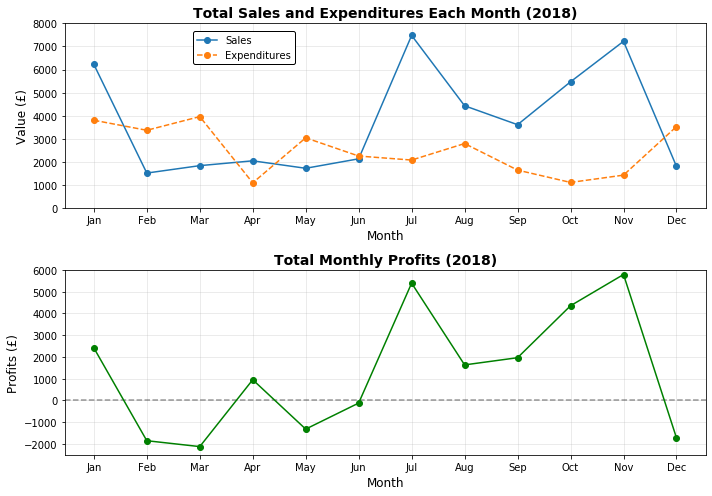

In [24]:
def monthly_sales():
    sales = write_sales()
    expenditure = write_expenditures()

    monthly_profit = [a - b for a, b in zip(sales, expenditure)]

    percentage_change = [int(0)]
    for previous, current in zip(sales, sales[1:]):
        percentage = round((((int(current) - int(previous)) / int(previous)) * 100), 1)
        percentage_change.append(percentage)

    print(f'\nList of total sales each month: £{sales}\n')
    print(f'List of total expenditures each month: £{expenditure}\n')
    print(f'List of total monthly profits: £{monthly_profit}\n')
    print(f'List of monthly sales changes as a percentage: {percentage_change}')

    print('\nThe total sales each month are:')
    for i, m in enumerate(zip(months, sales), start=1):
        print(m[0], ': £', m[1])

    print('\nThe total expenditures each month are:')
    for i, m in enumerate(zip(months, expenditure), start=1):
        print(m[0], ': £', m[1])

    print('\nThe total monthly profits are:')
    for i, m in enumerate(zip(months, monthly_profit), start=1):
        print(m[0], ': £', m[1])

    print('\nThe monthly sales changes as a percentage are:')
    for i, m in enumerate(zip(months, percentage_change), start=1):
        print(m[0], ':', m[1], '%')

    y_data_sales = np.array(sales)
    y_data_expenditures = np.array(expenditure)
    y_data_profits = np.array(monthly_profit)

    fig, axis = plt.subplots(nrows=2, ncols=1, figsize=(10, 7))
    fig.tight_layout(pad=4.0)
    fig.canvas.set_window_title('Sales Statistics (2018)')

    plt.subplot(2, 1, 1)
    plt.title('Total Sales and Expenditures Each Month (2018)', fontsize=14, fontweight='bold')
    plt.ylabel('Value (£)', fontsize=12)
    plt.xlabel('Month', fontsize=12)
    plt.ylim(0, 8000)
    plt.plot(months, y_data_sales, '-o', label='Sales')
    plt.plot(months, y_data_expenditures, '--o', label='Expenditures')
    plt.grid(alpha=0.3)
    plt.legend(loc=(0.2, 0.78), framealpha=1.0, edgecolor='k')

    plt.subplot(2, 1, 2)
    plt.title('Total Monthly Profits (2018)', fontsize=14, fontweight='bold')
    plt.ylabel('Profits (£)', fontsize=12)
    plt.xlabel('Month', fontsize=12)
    plt.ylim(-2500, 6000)
    plt.grid(alpha=0.3)
    plt.axhline(linestyle='--', color='k', alpha=0.4)
    plt.plot(months, y_data_profits, '-o', c='#008000')

    plt.tight_layout()
    plt.savefig('../CFG_Python_Data_Analysis_Project/salesgraphs.png', dpi=300)

    max_sale_value = max(sales)
    max_sale_index = sales.index(max_sale_value)

    if max_sale_index == 0:
        max_sale_month = 'January'
    elif max_sale_index == 1:
        max_sale_month = 'February'
    elif max_sale_index == 2:
        max_sale_month = 'March'
    elif max_sale_index == 3:
        max_sale_month = 'April'
    elif max_sale_index == 4:
        max_sale_month = 'May'
    elif max_sale_index == 5:
        max_sale_month = 'June'
    elif max_sale_index == 6:
        max_sale_month = 'July'
    elif max_sale_index == 7:
        max_sale_month = 'August'
    elif max_sale_index == 8:
        max_sale_month = 'September'
    elif max_sale_index == 9:
        max_sale_month = 'October'
    elif max_sale_index == 10:
        max_sale_month = 'November'
    else:
        max_sale_month = 'December'

    print(f'\nThe maximum sale month was {max_sale_month}, with a total of £{max_sale_value} worth of sales.')

    min_sale_value = min(sales)
    min_sale_index = sales.index(min_sale_value)

    if min_sale_index == 0:
        min_sale_month = 'January'
    elif min_sale_index == 1:
        min_sale_month = 'February'
    elif min_sale_index == 2:
        min_sale_month = 'March'
    elif min_sale_index == 3:
        min_sale_month = 'April'
    elif min_sale_index == 4:
        min_sale_month = 'May'
    elif min_sale_index == 5:
        min_sale_month = 'June'
    elif min_sale_index == 6:
        min_sale_month = 'July'
    elif min_sale_index == 7:
        min_sale_month = 'August'
    elif min_sale_index == 8:
        min_sale_month = 'September'
    elif min_sale_index == 9:
        min_sale_month = 'October'
    elif min_sale_index == 10:
        min_sale_month = 'November'
    else:
        min_sale_month = 'December'

    print(f'The minimum sale month was {min_sale_month}, with a total of £{min_sale_value} worth of sales.')

    year_total_sales = sum(sales)
    print(f'\nTotal sales of the year 2018: £{year_total_sales}')

    sale_year_avg = round((year_total_sales / 12), 2)
    print(f'Average yearly sale of 2018: £{sale_year_avg}')

    year_total_expenditures = sum(expenditure)
    print(f'\nTotal expenditures of the year 2018: £{year_total_expenditures}')

    expenditures_year_avg = round((year_total_expenditures / 12), 2)
    print(f'Average yearly expenditure of 2018: £{expenditures_year_avg}\n')

    year_total_profit = year_total_sales - year_total_expenditures
    print(f'Total profit in 2018: £{year_total_profit}')

    profit_year_avg = round((year_total_profit / 12), 2)
    print(f'Average yearly profit of 2018: £{profit_year_avg}')
    

months = np.array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()
monthly_sales()

In [17]:
def total_sales():
    data = read_sales()
    sales = []
    running_total = []
    for row in data:
        sale = int(row['sales'])
        sales.append(sale)

        total = sum(sales)
        running_total.append(total)

    print('\nThe running sales totals of each month are:')
    for i, m in enumerate(zip(months, running_total), start=1):
        print(m[0], ': £', m[1])
        

total_sales()


The running sales totals of each month are:
Jan : £ 6226
Feb : £ 7747
Mar : £ 9589
Apr : £ 11640
May : £ 13368
Jun : £ 15506
Jul : £ 22985
Aug : £ 27419
Sep : £ 31034
Oct : £ 36506
Nov : £ 43730
Dec : £ 45542


In [18]:
def read_sales_pandas():
    print('\nThe sales and expenditures data from each month in 2018:')
    df = pd.read_csv('sales.csv')
    print(df)
    print('')

    sales_info = df.describe()
    print('The sales and expenditures statistics from each month in 2018:')
    print(sales_info[['sales', 'expenditure']])
    
    
read_sales_pandas()


The sales and expenditures data from each month in 2018:
    year month  sales  expenditure
0   2018   jan   6226         3808
1   2018   feb   1521         3373
2   2018   mar   1842         3965
3   2018   apr   2051         1098
4   2018   may   1728         3046
5   2018   jun   2138         2258
6   2018   jul   7479         2084
7   2018   aug   4434         2799
8   2018   sep   3615         1649
9   2018   oct   5472         1116
10  2018   nov   7224         1431
11  2018   dec   1812         3532

The sales and expenditures statistics from each month in 2018:
             sales  expenditure
count    12.000000    12.000000
mean   3795.166667  2513.250000
std    2285.725579  1046.608994
min    1521.000000  1098.000000
25%    1834.500000  1594.500000
50%    2876.500000  2528.500000
75%    5660.500000  3412.750000
max    7479.000000  3965.000000


In [19]:
def seasonal_sales():
    sales = write_sales()
    expenditure = write_expenditures()

    winter_sales = sales[-1] + sales[0] + sales[1]
    spring_sales = sales[2] + sales[3] + sales[4]
    summer_sales = sales[5] + sales[6] + sales[7]
    autumn_sales = sales[8] + sales[9] + sales[10]

    print(f'\nTotal winter sales: £{winter_sales}')
    print(f'Total spring sales: £{spring_sales}')
    print(f'Total summer sales: £{summer_sales}')
    print(f'Total autumn sales: £{autumn_sales}\n')

    sales_season = input('What sales season is it? ').lower()

    if (sales_season == 'winter' and winter_sales >= 10000) or \
            (sales_season == 'spring' and spring_sales >= 10000) or \
            (sales_season == 'summer' and summer_sales >= 10000) or \
            (sales_season == 'autumn' and autumn_sales >= 10000):
        print('You are getting a 20% pay rise!')
    elif (sales_season == 'winter' and winter_sales >= 8000) or \
            (sales_season == 'spring' and spring_sales >= 8000) or \
            (sales_season == 'summer' and summer_sales >= 8000) or \
            (sales_season == 'autumn' and autumn_sales >= 8000):
        print('You are getting a 10% pay rise!')
    else:
        print('You are not getting a pay rise - work harder!')

    winter_expenditures = expenditure[-1] + expenditure[0] + expenditure[1]
    spring_expenditures = expenditure[2] + expenditure[3] + expenditure[4]
    summer_expenditures = expenditure[5] + expenditure[6] + expenditure[7]
    autumn_expenditures = expenditure[8] + expenditure[9] + expenditure[10]

    winter_profit = winter_sales - winter_expenditures
    spring_profit = spring_sales - spring_expenditures
    summer_profit = summer_sales - summer_expenditures
    autumn_profit = autumn_sales - autumn_expenditures

    print(f'\nTotal winter profit: £{winter_profit}')
    print(f'Total spring profit: £{spring_profit}')
    print(f'Total summer profit: £{summer_profit}')
    print(f'Total autumn profit: £{autumn_profit}\n')

    quarter = input("What season is this? ").lower()

    if (quarter == 'winter' and winter_profit >= 10000) or \
            (quarter == 'spring' and spring_profit >= 10000) or \
            (quarter == 'summer' and summer_profit >= 10000) or \
            (quarter == 'autumn' and autumn_profit >= 10000):
        print('Business is good!')
    elif (quarter == 'winter' and winter_profit < 0) or \
            (quarter == 'spring' and spring_profit < 0) or \
            (quarter == 'summer' and summer_profit < 0) or \
            (quarter == 'autumn' and autumn_profit < 0):
        print('Wait - we need to downsize and fire people!')
    else:
        print('Business is okay')
        
        
seasonal_sales()


Total winter sales: £9559
Total spring sales: £5621
Total summer sales: £14051
Total autumn sales: £16311

What sales season is it? Winter
You are getting a 10% pay rise!

Total winter profit: £-1154
Total spring profit: £-2488
Total summer profit: £6910
Total autumn profit: £12115

What season is this? Winter
Wait - we need to downsize and fire people!
